## Data Scrub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [133]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [134]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [17]:
df.view.unique()

array([0., 3., 4., 2., 1.])

In [18]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [19]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

Now that we have a better insight into the actual data, its time to clean up the data and get it ready for exploration. Based on df.info() above, we are going to handle those values that are objects.

### date

The date is set as a mm/dd/yyyy format and the '/' have saved these values as objects. Time of year for home sales is of definite interest for us initially as a predictor of price, but not by exact date. We will pull the month and create its own column.

In [9]:
pd.to_datetime(df.date)
df['month']=pd.DatetimeIndex(df['date']).month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
dtypes: float64(8), int64(12), object

In [3]:
df.price = df.price.astype(np.int64, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
dtypes: float64(7), int64(13), object(2

### sqft_basement

This object just needs converted to a numerical format and discovered there is a value '?' that we need to handle before converting this column. 

In [40]:

df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
283.0         1
652.0         1
1525.0        1
2190.0        1
875.0         1
2500.0        1
1770.0        1
1008.0        1
935.0         1
704.0         1
862.0         1
1990.0        1
2310.0        1
2360.0        1
225.0         1
1548.0        1
207.0         1
2810.0        1
2610.0        1
176.0         1
295.0         1
1920.0        1
2580.0        1
4130.0        1
1880.0        1
602.0         1
1852.0        1
506.0         1
861.0         1
1024.0        1
Name: sqft_basement, Len

In [4]:
df=df[df.sqft_basement != '?']

In [5]:
df.sqft_basement=df.sqft_basement.astype(float, inplace=True)



Waterfront, view and yr_renovated columns all contain null values. We are going to take care of these so that we have full data columns. While we are fixing the null values, each column will be handled individually to determine what to do with the vaid data.

In [4]:
df.waterfront.unique()

array([nan,  0.,  1.])

Waterfront is basically a True/False value set as integers. The null values were unobtainable. We will convert the null value to 0 or False.

In [5]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

View is more than just a True/False value. It can be determined that this is the number of times the property was viewed before sale. We will convert the null values to the mean of the dataset.

In [6]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Yr_renovated has the actual year of renovation, a 0 value for not renovated, and the corresponding null values. We will convert the null values to 0. Since most values are 0, it would be best to set the nulls to zero rather than guess that a renovation has occured at a mean date when the date could be before original construction.

In [6]:
df.yr_renovated.fillna(value = df.yr_renovated.mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
date             21143 non-null object
price            21143 non-null int64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     21143 non-null float64
zipcode          21143 non-null int64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
month            21143 non-null int64
dtypes: float64(5), int64(12), object(1)
memory usage: 3.1+ MB


In [13]:
df=df.dropna()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price            21082 non-null int64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null int64
yr_built         21082 non-null int64
yr_renovated     21082 non-null int64
zipcode          21082 non-null int64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
month            21082 non-null int64
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


In [152]:
df.view=df.view.astype(np.int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 18 columns):
date             21082 non-null object
price            21082 non-null int64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
month            21082 non-null int64
dtypes: float64(5), int64(12), object(1)
memory usage: 3.1+ MB


### Removable data

The features of id, long and lat will be removed from the dataset. It is believed that the longitude and latitude of the homes will be of use for investor visualization, but the zipcode should suffice for location data. The id created by the county will have no relevance to price.

In [8]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.drop('long', axis=1, inplace=True)

In [10]:
df.drop('lat', axis=1, inplace=True)

In [11]:
df.drop('waterfront', axis=1, inplace=True)

In [19]:
df.drop('date', axis=1, inplace=True)

In [20]:
df.duplicated(keep=False).sum()

4

In [21]:
df=df.drop_duplicates()

We are going to save this data as its own .csv for now.

In [17]:
df.to_csv('df_scrubalt.csv', index=False)

In [ ]:
We are going to take a look at a correlation heatmap to detect early signs of multicollinearity between features.

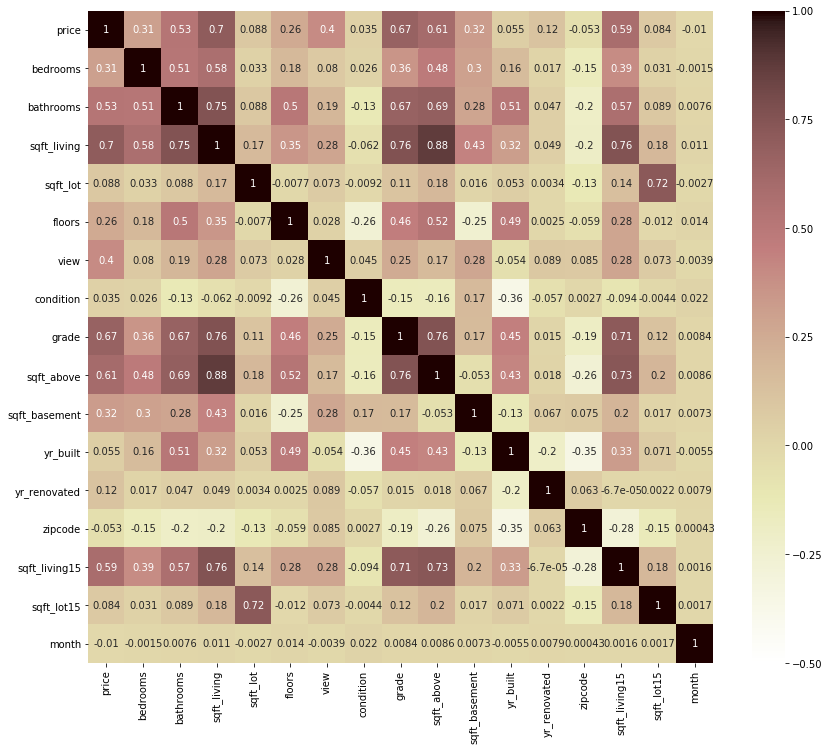

In [23]:
#awesome heatmap code with individual annotation for a multicollinearity map
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

Upon first look, there are three features that could pose a possible problem, sqft_living, sqft_lot15, sqft_above. They do highy positively correlate to several features. The decision for now will be to take a closer look and determine if any will be logical to remove.

In [2]:
df_map = df[['long', 'lat']]

In [3]:
df_map.head()

,long,lat
0,-122.257,47.5112
1,-122.319,47.7210
2,-122.233,47.7379
3,-122.393,47.5208
4,-122.045,47.6168


In [8]:
list(df_map.nunique())

[751, 5033]

In [10]:
df.month.value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64